# Курс: Аналитик данных (МГТУ им. Н.Э. Баумана)
## Выпускной проект. Кейс 2
### Слушатель: Русаков Глеб Игоревич, группа AD11902/1

#### Импорт необходимых библиотек

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
%matplotlib inline

## Переименование заголовков для удобства:
#### FILLMAT: матрица-наполнитель
#### DENSITY: плотность
#### FLEXMOD: модуль упругости
#### HARDAM: количество отвердителя
#### EPOXY: содержание эпоксидных групп
#### TFLASH: температура вспышки
#### SURDEN: поверхностная плотность
#### FLMODSTR: модуль упругости при растяжении
#### DURSTR: прочность при растяжении
#### EPOXCON: потребление смолы
#### TANPATCH: угол нашивки
#### STEPPATCH: шаг нашивки
#### DENPATCH: плотность нашивки

In [3]:
titles1 = ['FILLMAT', 'DENSITY', 'FLEXMOD', 'HARDAM', 'EPOXY',
            'TFLASH', 'SURDEN', 'FLMODSTR', 'DURSTR', 'EPOXCON']
titles2 = ['TANPATCH', 'STEPPATCH', 'DENPATCH']

#### Чтение данных из таблицы

In [4]:
df1 = pd.read_excel('X_bp.xlsx', names=titles1)
df2 = pd.read_excel('X_nup.xlsx', names=titles2)

#### Проверка содержимого первых элементов DataFrame'ов

In [5]:
df1.head()

FILLMAT  DENSITY     FLEXMOD  HARDAM      EPOXY      TFLASH  SURDEN  \
0  1.857143   2030.0  738.736842   30.00  22.267857  100.000000   210.0   
1  1.857143   2030.0  738.736842   50.00  23.750000  284.615385   210.0   
2  1.857143   2030.0  738.736842   49.90  33.000000  284.615385   210.0   
3  1.857143   2030.0  738.736842  129.00  21.250000  300.000000   210.0   
4  2.771331   2030.0  753.000000  111.86  22.267857  284.615385   210.0   

   FLMODSTR  DURSTR  EPOXCON  
0      70.0  3000.0    220.0  
1      70.0  3000.0    220.0  
2      70.0  3000.0    220.0  
3      70.0  3000.0    220.0  
4      70.0  3000.0    220.0

In [6]:
df2.head()

TANPATCH  STEPPATCH  DENPATCH
0         0        4.0      57.0
1         0        4.0      60.0
2         0        4.0      70.0
3         0        5.0      47.0
4         0        5.0      57.0

#### Объеденение двух таблиц по индексу, метод INNER

In [7]:
data = df1.merge(how='inner', right=df2, left_index=True, right_index=True)

#### Проверка содержимого в начале и конце

In [8]:
data.head()

FILLMAT  DENSITY     FLEXMOD  HARDAM      EPOXY      TFLASH  SURDEN  \
0  1.857143   2030.0  738.736842   30.00  22.267857  100.000000   210.0   
1  1.857143   2030.0  738.736842   50.00  23.750000  284.615385   210.0   
2  1.857143   2030.0  738.736842   49.90  33.000000  284.615385   210.0   
3  1.857143   2030.0  738.736842  129.00  21.250000  300.000000   210.0   
4  2.771331   2030.0  753.000000  111.86  22.267857  284.615385   210.0   

   FLMODSTR  DURSTR  EPOXCON  TANPATCH  STEPPATCH  DENPATCH  
0      70.0  3000.0    220.0         0        4.0      57.0  
1      70.0  3000.0    220.0         0        4.0      60.0  
2      70.0  3000.0    220.0         0        4.0      70.0  
3      70.0  3000.0    220.0         0        5.0      47.0  
4      70.0  3000.0    220.0         0        5.0      57.0

In [9]:
data.tail()

FILLMAT      DENSITY     FLEXMOD      HARDAM      EPOXY      TFLASH  \
1018  2.271346  1952.087902  912.855545   86.992183  20.123249  324.774576   
1019  3.444022  2050.089171  444.732634  145.981978  19.599769  254.215401   
1020  3.280604  1972.372865  416.836524  110.533477  23.957502  248.423047   
1021  3.705351  2066.799773  741.475517  141.397963  19.246945  275.779840   
1022  3.808020  1890.413468  417.316232  129.183416  27.474763  300.952708   

          SURDEN   FLMODSTR       DURSTR     EPOXCON  TANPATCH  STEPPATCH  \
1018  209.198700  73.090961  2387.292495  125.007669        90   9.076380   
1019  350.660830  72.920827  2360.392784  117.730099        90  10.565614   
1020  740.142791  74.734344  2662.906040  236.606764        90   4.161154   
1021  641.468152  74.042708  2071.715856  197.126067        90   6.313201   
1022  758.747882  74.309704  2856.328932  194.754342        90   6.078902   

       DENPATCH  
1018  47.019770  
1019  53.750790  
1020  67.629684  
1021  58.261074  
1022  77.434468

#### Общая информация содержащихся значений

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FILLMAT    1023 non-null   float64
 1   DENSITY    1023 non-null   float64
 2   FLEXMOD    1023 non-null   float64
 3   HARDAM     1023 non-null   float64
 4   EPOXY      1023 non-null   float64
 5   TFLASH     1023 non-null   float64
 6   SURDEN     1023 non-null   float64
 7   FLMODSTR   1023 non-null   float64
 8   DURSTR     1023 non-null   float64
 9   EPOXCON    1023 non-null   float64
 10  TANPATCH   1023 non-null   int64  
 11  STEPPATCH  1023 non-null   float64
 12  DENPATCH   1023 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 111.9 KB


#### Проверка пропусков

In [11]:
data.isnull().sum()

FILLMAT      0
DENSITY      0
FLEXMOD      0
HARDAM       0
EPOXY        0
TFLASH       0
SURDEN       0
FLMODSTR     0
DURSTR       0
EPOXCON      0
TANPATCH     0
STEPPATCH    0
DENPATCH     0
dtype: int64

Вывод: пропусков не обнаружено

Основные статистические показатели

In [12]:
data.describe()

FILLMAT      DENSITY      FLEXMOD       HARDAM        EPOXY  \
count  1023.000000  1023.000000  1023.000000  1023.000000  1023.000000   
mean      2.930366  1975.734888   739.923233   110.570769    22.244390   
std       0.913222    73.729231   330.231581    28.295911     2.406301   
min       0.389403  1731.764635     2.436909    17.740275    14.254985   
25%       2.317887  1924.155467   500.047452    92.443497    20.608034   
50%       2.906878  1977.621657   739.664328   110.564840    22.230744   
75%       3.552660  2021.374375   961.812526   129.730366    23.961934   
max       5.591742  2207.773481  1911.536477   198.953207    33.000000   

            TFLASH       SURDEN     FLMODSTR       DURSTR      EPOXCON  \
count  1023.000000  1023.000000  1023.000000  1023.000000  1023.000000   
mean    285.882151   482.731833    73.328571  2466.922843   218.423144   
std      40.943260   281.314690     3.118983   485.628006    59.735931   
min     100.000000     0.603740    64.054061  1036.856605    33.803026   
25%     259.066528   266.816645    71.245018  2135.850448   179.627520   
50%     285.896812   451.864365    73.268805  2459.524526   219.198882   
75%     313.002106   693.225017    75.356612  2767.193119   257.481724   
max     413.273418  1399.542362    82.682051  3848.436732   414.590628   

          TANPATCH    STEPPATCH     DENPATCH  
count  1023.000000  1023.000000  1023.000000  
mean     44.252199     6.899222    57.153929  
std      45.015793     2.563467    12.350969  
min       0.000000     0.000000     0.000000  
25%       0.000000     5.080033    49.799212  
50%       0.000000     6.916144    57.341920  
75%      90.000000     8.586293    64.944961  
max      90.000000    14.440522   103.988901

In [13]:
data.corr(method='spearman')

FILLMAT   DENSITY   FLEXMOD    HARDAM     EPOXY    TFLASH  \
FILLMAT    1.000000 -0.005542  0.031823  0.002496  0.016358 -0.013635   
DENSITY   -0.005542  1.000000 -0.010097 -0.032907 -0.012287 -0.030447   
FLEXMOD    0.031823 -0.010097  1.000000  0.033397  0.002016  0.031247   
HARDAM     0.002496 -0.032907  0.033397  1.000000 -0.001652  0.086970   
EPOXY      0.016358 -0.012287  0.002016 -0.001652  1.000000 -0.003641   
TFLASH    -0.013635 -0.030447  0.031247  0.086970 -0.003641  1.000000   
SURDEN    -0.003896  0.055071 -0.001318  0.050751 -0.011232  0.025441   
FLMODSTR  -0.006459 -0.032446  0.007705 -0.064127  0.061930  0.024625   
DURSTR     0.017554 -0.069816  0.033750 -0.067707 -0.019193 -0.028283   
EPOXCON    0.054084 -0.025729  0.008010 -0.006371  0.014230  0.051763   
TANPATCH  -0.026190 -0.063073 -0.038800  0.030222  0.005714  0.021886   
STEPPATCH  0.032510 -0.045941 -0.011851  0.008440 -0.007421  0.043075   
DENPATCH   0.004570  0.080001  0.072628  0.025265 -0.032182  0.008160   

             SURDEN  FLMODSTR    DURSTR   EPOXCON  TANPATCH  STEPPATCH  \
FILLMAT   -0.003896 -0.006459  0.017554  0.054084 -0.026190   0.032510   
DENSITY    0.055071 -0.032446 -0.069816 -0.025729 -0.063073  -0.045941   
FLEXMOD   -0.001318  0.007705  0.033750  0.008010 -0.038800  -0.011851   
HARDAM     0.050751 -0.064127 -0.067707 -0.006371  0.030222   0.008440   
EPOXY     -0.011232  0.061930 -0.019193  0.014230  0.005714  -0.007421   
TFLASH     0.025441  0.024625 -0.028283  0.051763  0.021886   0.043075   
SURDEN     1.000000  0.035319 -0.008221 -0.005344  0.055637   0.037675   
FLMODSTR   0.035319  1.000000 -0.009970  0.052450  0.027458  -0.014210   
DURSTR    -0.008221 -0.009970  1.000000  0.020831  0.025226  -0.071915   
EPOXCON   -0.005344  0.052450  0.020831  1.000000 -0.002940   0.009288   
TANPATCH   0.055637  0.027458  0.025226 -0.002940  1.000000   0.025922   
STEPPATCH  0.037675 -0.014210 -0.071915  0.009288  0.025922   1.000000   
DENPATCH  -0.032404 -0.003225  0.014950  0.016236  0.100538   0.000627   

           DENPATCH  
FILLMAT    0.004570  
DENSITY    0.080001  
FLEXMOD    0.072628  
HARDAM     0.025265  
EPOXY     -0.032182  
TFLASH     0.008160  
SURDEN    -0.032404  
FLMODSTR  -0.003225  
DURSTR     0.014950  
EPOXCON    0.016236  
TANPATCH   0.100538  
STEPPATCH  0.000627  
DENPATCH   1.000000

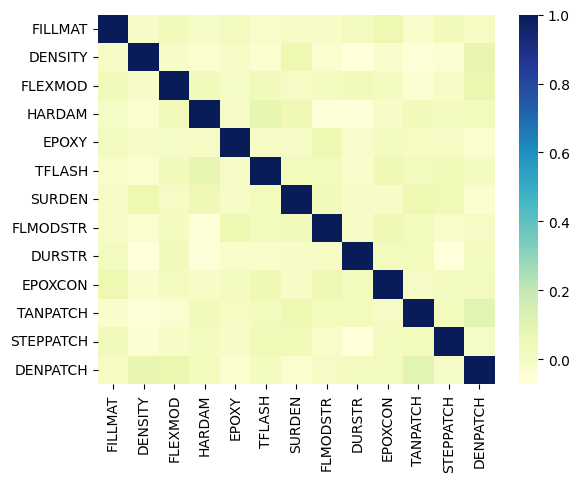

In [14]:
dataplot = sns.heatmap(data.corr(method='spearman'), cmap='YlGnBu')
plt.rcParams['figure.figsize'] = (15, 15)
plt.show()

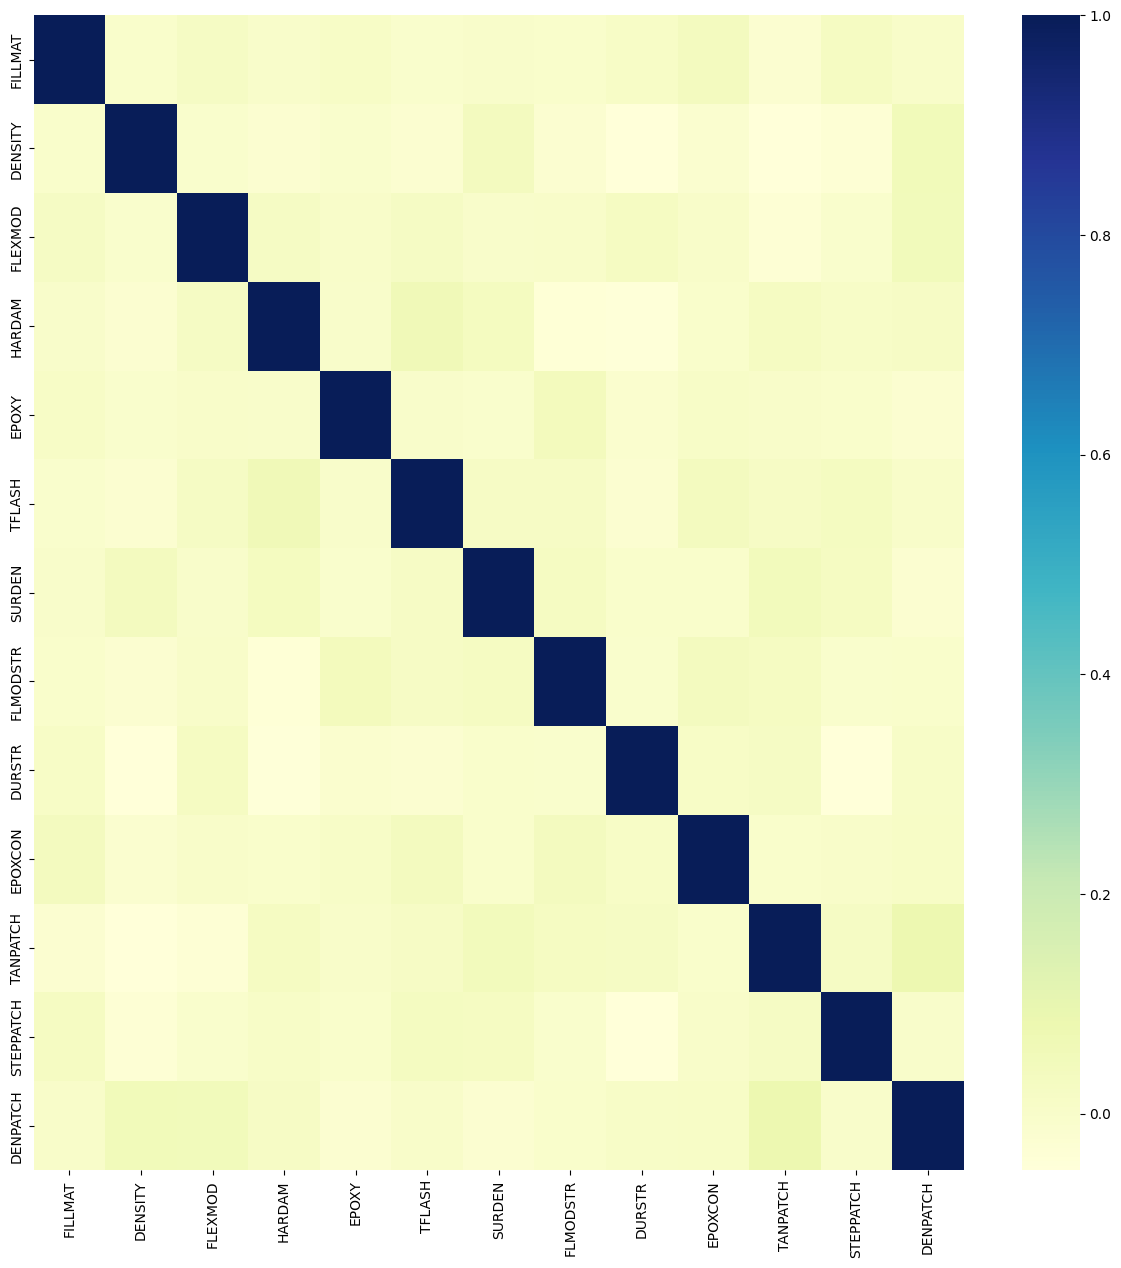

In [15]:
dataplot = sns.heatmap(data.corr(method='kendall'), cmap='YlGnBu')
plt.rcParams['figure.figsize'] = (15, 15)
plt.show()

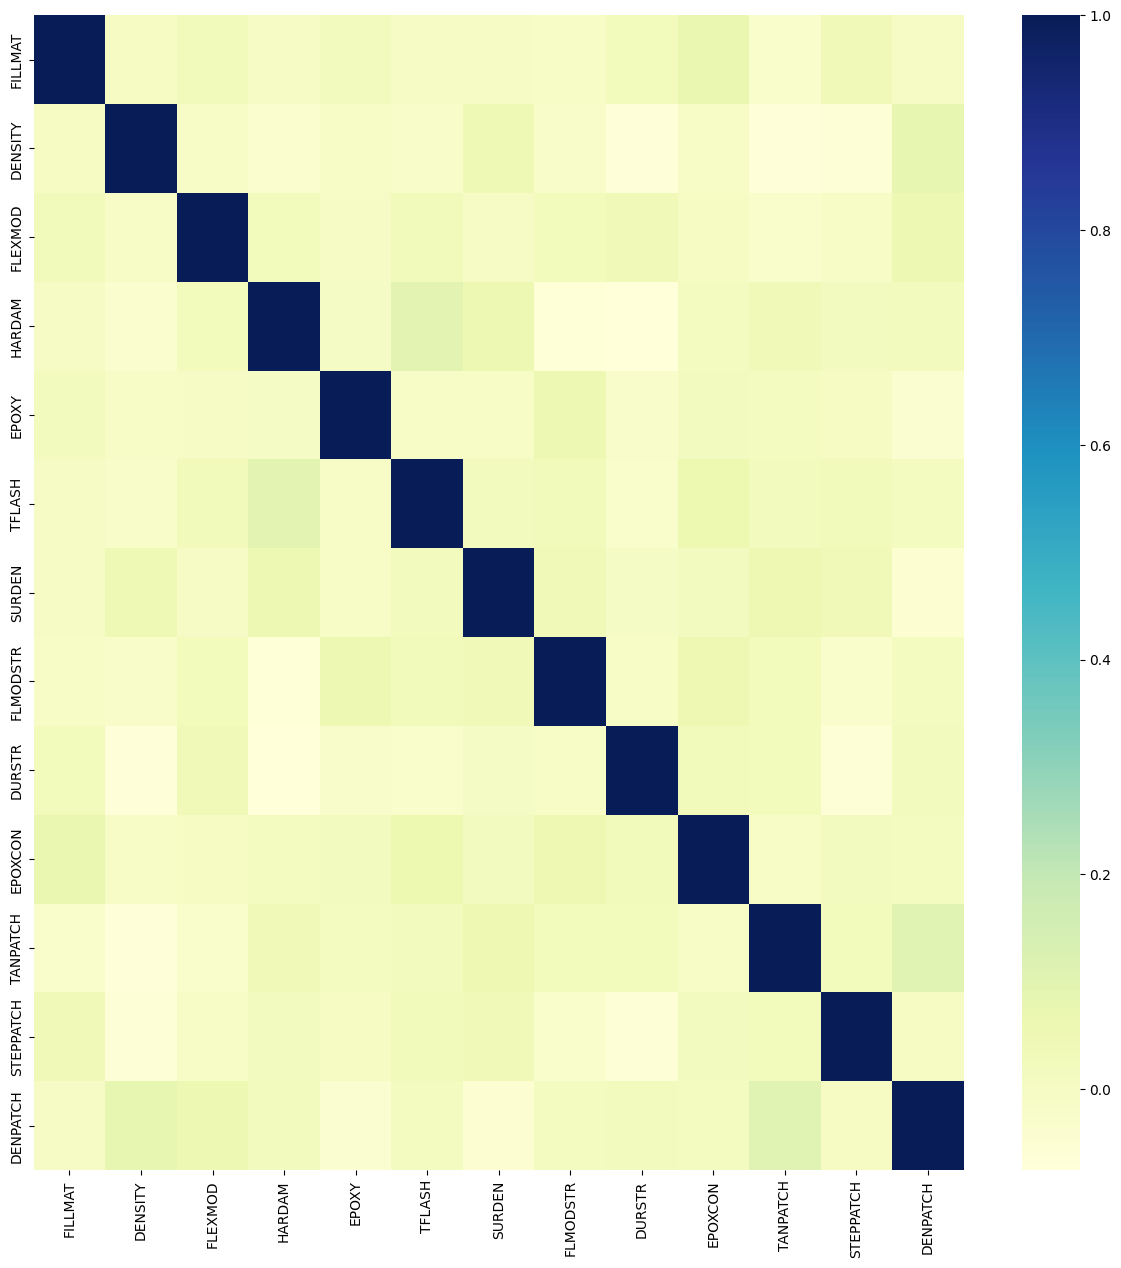

In [16]:
dataplot = sns.heatmap(data.corr(method='pearson'), cmap='YlGnBu')
plt.rcParams['figure.figsize'] = (15, 15)
plt.show()

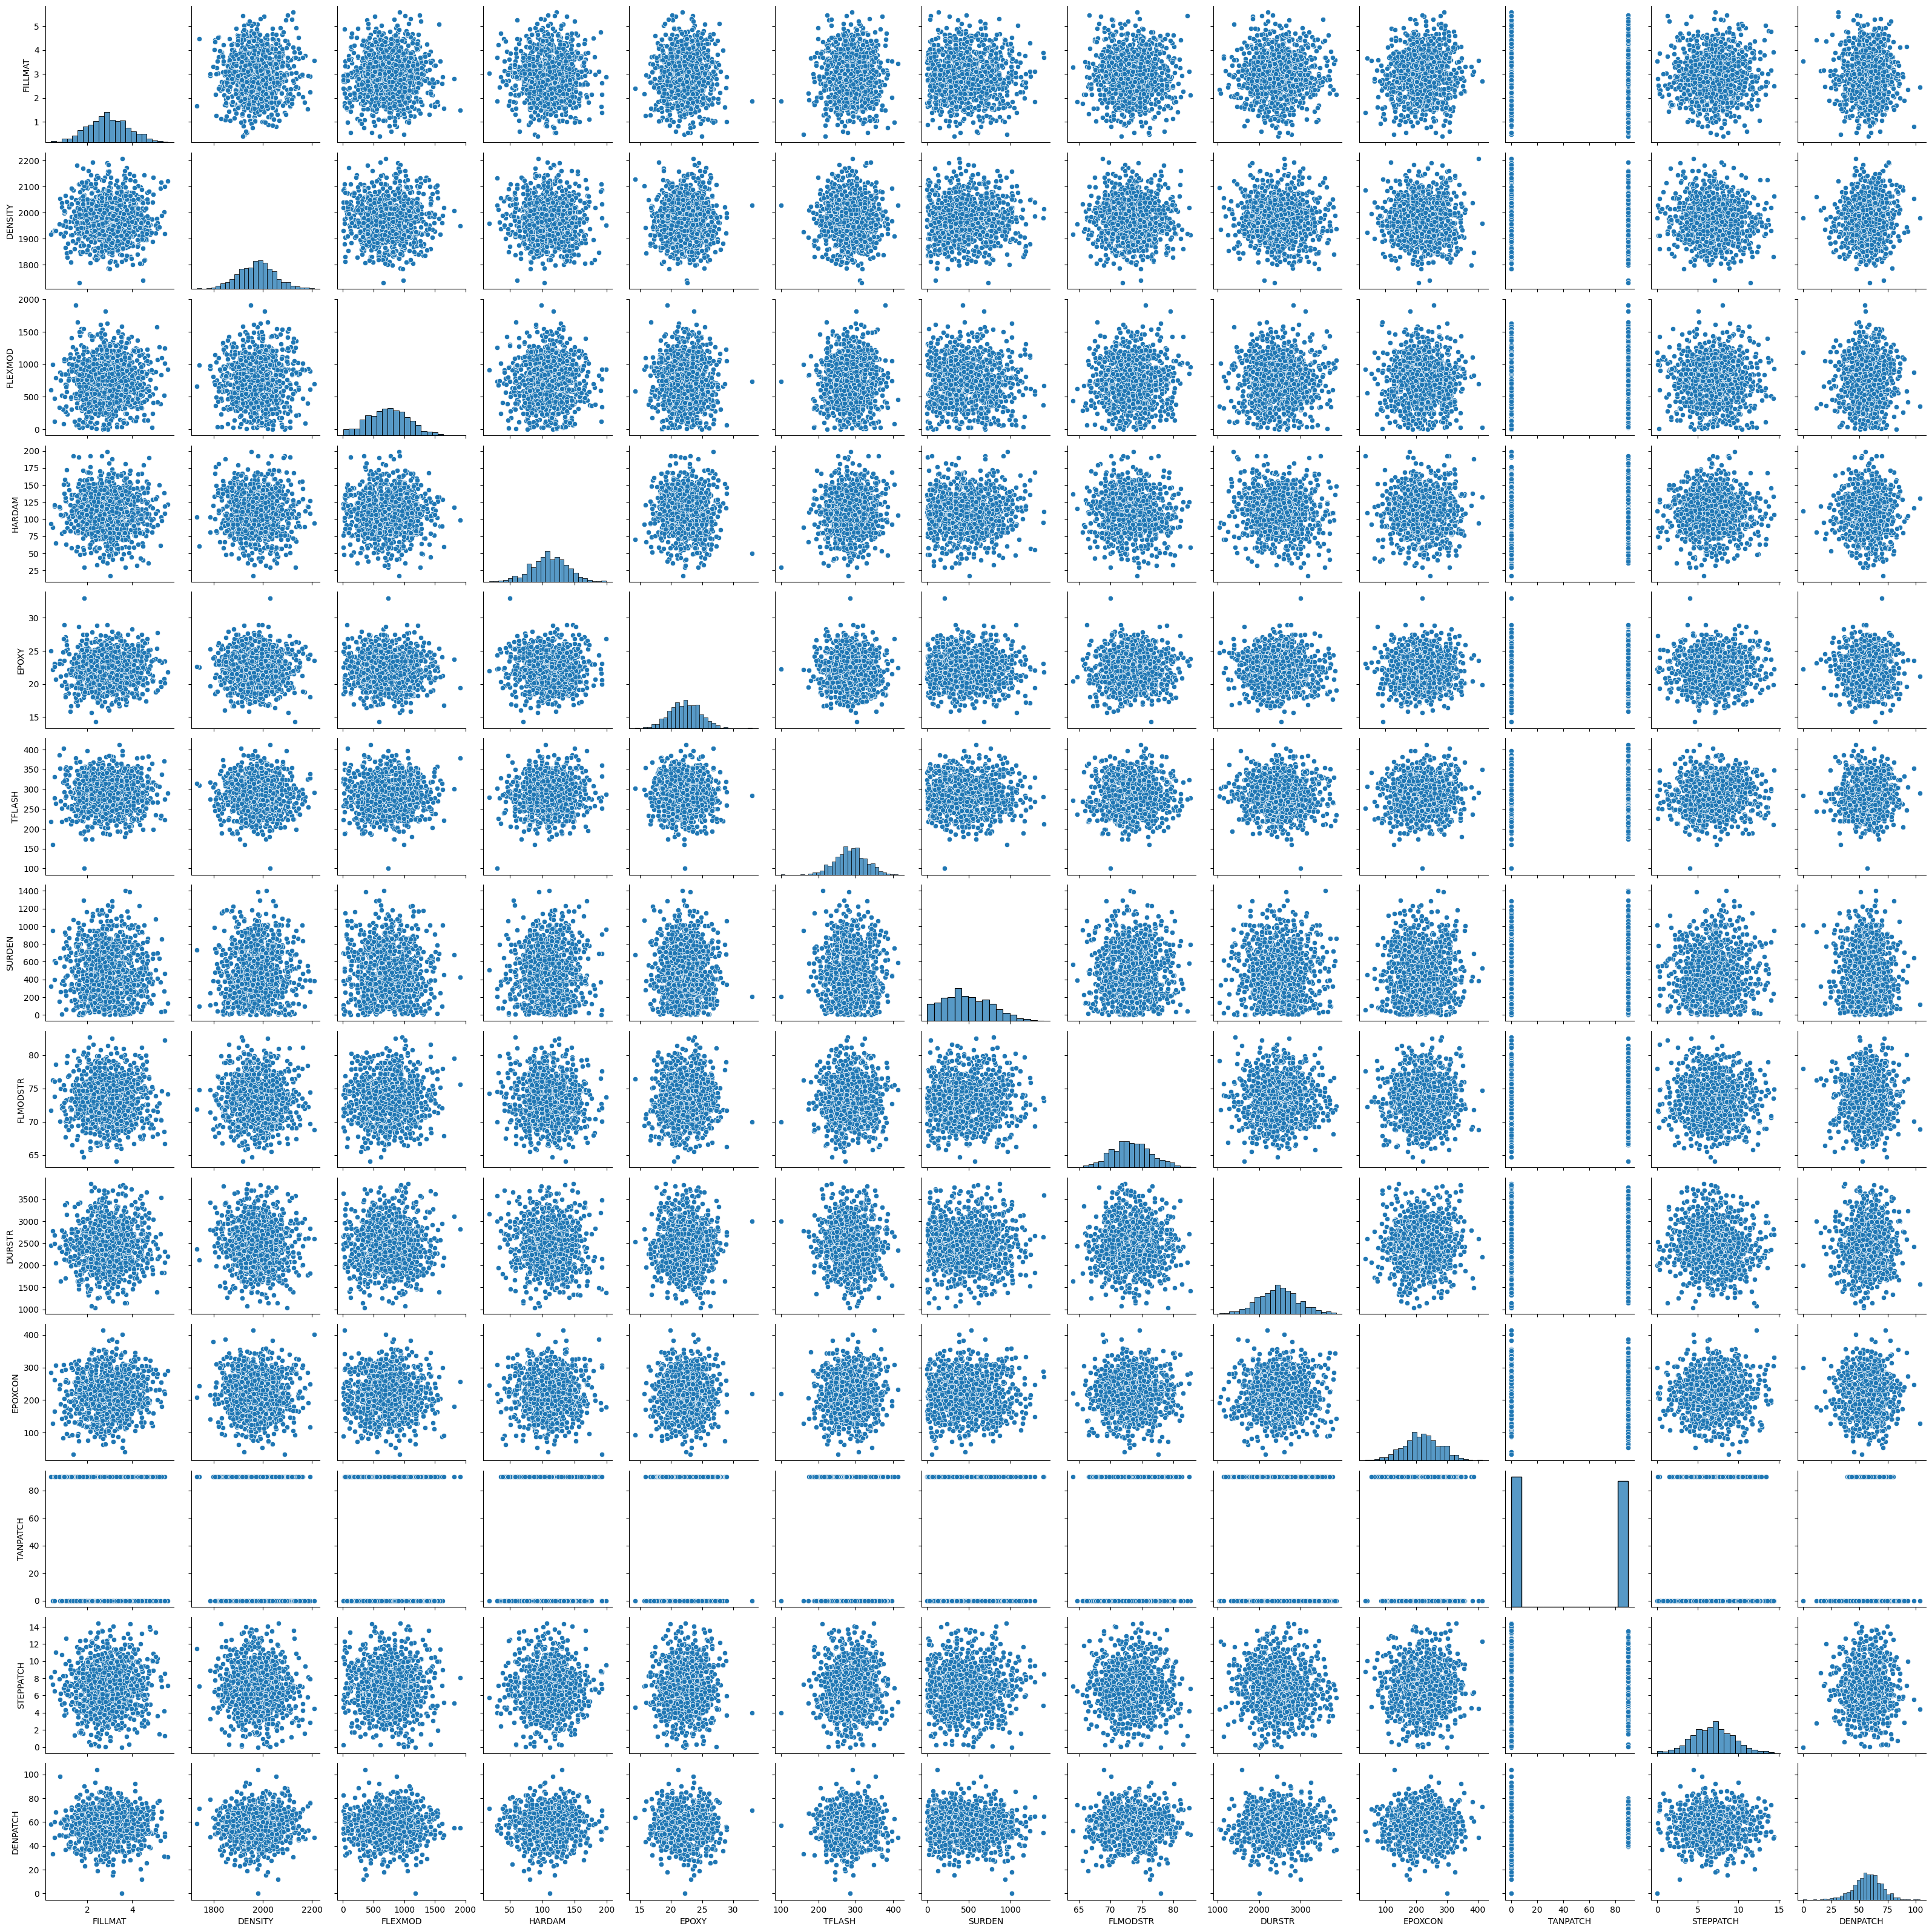

In [17]:
sns.pairplot(data)

Text(0, 0.5, 'Плотность нашивки')

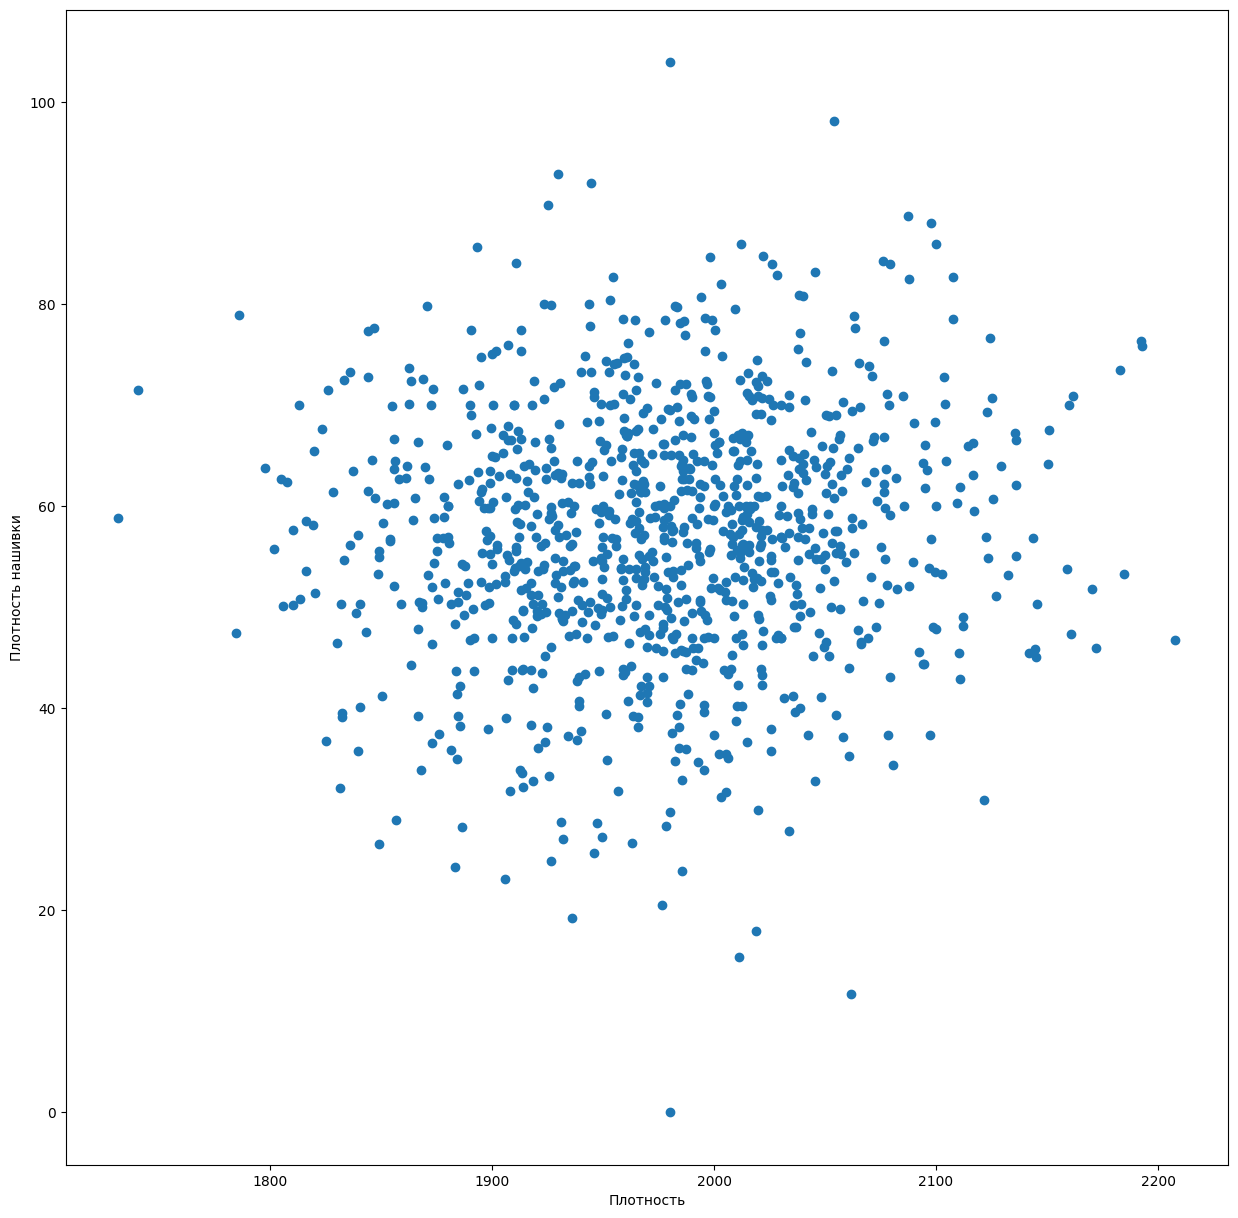

In [18]:
plt.plot(data['DENSITY'], data['DENPATCH'], 'o')

plt.xlabel('Плотность')
plt.ylabel('Плотность нашивки')

